In [98]:
import pandas as pd
import random

In [2]:
url = '../dataset/dataset_light.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,event_type,product_id,category_id,brand,price,user_id,user_session,date,time,first_level,secont_level,third_level
0,view,44600062,2103807459595387724,shiseido,35.79,541312140,23-a032dfed738,2019-10-01,00:00:00,empty,empty,empty
1,view,3900821,2053013552326770905,aqua,33.20,554748717,57-6336556b0fc,2019-10-01,00:00:00,appliances,environment,water_heater
2,view,17200506,2053013559792632471,etc,543.10,519107250,95-cf8e6e792ca,2019-10-01,00:00:01,furniture,living_room,sofa
3,view,1307067,2053013558920217191,lenovo,251.74,550050854,f3-13c02c18c71,2019-10-01,00:00:01,computers,notebook,notebook
4,view,1004237,2053013555631882655,apple,1081.98,535871217,b4-8cec9ff8b80,2019-10-01,00:00:04,electronics,smartphone,smartphone


In [44]:
df.loc[df['user_id'] == 512475445]['event_type'].value_counts()

view    7436
Name: event_type, dtype: int64

In [45]:
df.loc[df['user_id'] == 512475445]

,event_type,product_id,category_id,brand,price,user_id,user_session,date,time,first_level,secont_level,third_level
382718,view,5700619,2053013553970938175,jvc,46.33,512475445,d6-2cae9372303,2019-10-01,08:43:20,auto,accessories,player
383115,view,5800572,2053013553945772349,pioneer,27.03,512475445,ae-f215bb76df1,2019-10-01,08:43:39,electronics,audio,subwoofer
383196,view,5800802,2053013553945772349,kenwood,48.73,512475445,4f-a261f39191b,2019-10-01,08:43:44,electronics,audio,subwoofer
383693,view,6100194,2053013560866374351,etc,90.35,512475445,11-e0245a91f35,2019-10-01,08:44:10,auto,accessories,radar
384116,view,4700565,2053013560899928785,blackvue,233.99,512475445,21-8e768c9a729,2019-10-01,08:44:32,auto,accessories,videoregister
...,...,...,...,...,...,...,...,...,...,...,...,...
42350688,view,5701127,2053013553970938175,pioneer,215.86,512475445,dd-7845395000d,2019-10-31,18:52:57,auto,accessories,player
42350778,view,5700793,2053013553970938175,kenwood,182.55,512475445,c5-1549b60814e,2019-10-31,18:53:03,auto,accessories,player
42350886,view,5701197,2053013553970938175,nakamichi,78.38,512475445,bf-e77d0522fd7,2019-10-31,18:53:08,auto,accessories,player
42350975,view,4700478,2053013560899928785,sho-me,141.86,512475445,2f-189e4047b0f,2019-10-31,18:53:13,auto,accessories,videoregister


# user 세분화

## session 탐색

In [4]:
cpy = df[['user_id','user_session']].copy()

42448764

In [6]:
cpy_1 = cpy.drop_duplicates(subset=['user_session'])

In [97]:
cpy_1['user_id'].value_counts()

512475445    7400
526731152    2773
514649263    2336
563459593    1618
561163588    1182
             ... 
560082585       1
515400057       1
516282444       1
560082675       1
544578298       1
Name: user_id, Length: 3022234, dtype: int64

<AxesSubplot:>

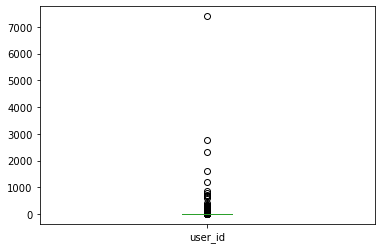

In [48]:
cpy_1['user_id'].value_counts().plot(kind='box')

In [94]:
df.loc[df['user_id'] == 513021392]

,event_type,product_id,category_id,brand,price,user_id,user_session,date,time,first_level,secont_level,third_level
554182,view,1004739,2053013555631882655,xiaomi,197.43,513021392,c5-20a2ac3ccd0,2019-10-01,11:12:26,electronics,smartphone,smartphone
554422,view,1004791,2053013555631882655,xiaomi,142.86,513021392,c5-20a2ac3ccd0,2019-10-01,11:12:38,electronics,smartphone,smartphone
554779,view,1003609,2053013555631882655,meizu,126.13,513021392,c5-20a2ac3ccd0,2019-10-01,11:12:58,electronics,smartphone,smartphone
554961,view,1003609,2053013555631882655,meizu,126.13,513021392,c5-20a2ac3ccd0,2019-10-01,11:13:08,electronics,smartphone,smartphone
4029058,view,1004934,2053013555631882655,vivo,205.90,513021392,84-e9b4899aab2,2019-10-04,09:01:03,electronics,smartphone,smartphone
...,...,...,...,...,...,...,...,...,...,...,...,...
41974948,view,1005087,2053013555631882655,gionee,123.30,513021392,26-0242d56c29b,2019-10-31,14:26:41,electronics,smartphone,smartphone
41975965,view,1004565,2053013555631882655,huawei,164.96,513021392,26-0242d56c29b,2019-10-31,14:27:24,electronics,smartphone,smartphone
41976279,view,1004565,2053013555631882655,huawei,164.96,513021392,26-0242d56c29b,2019-10-31,14:27:38,electronics,smartphone,smartphone
41977022,view,1004209,2053013555631882655,samsung,88.29,513021392,26-0242d56c29b,2019-10-31,14:28:07,electronics,smartphone,smartphone


세션의 수가 유의미하게 많은 user id를 살펴보니 시간대로 확인해보면 세션값이 제대로 저장되지 않은 듯 하다
* session에 대한 전처리가 있던지 다른 방법으로 유저를 세분화 해야할 듯

In [49]:
cpy = df[['user_id','event_type']].copy()

In [65]:
event = cpy.groupby(['user_id','event_type']).size().reset_index().sort_values('user_id')

In [86]:
user_id_list = sorted(cpy['user_id'].value_counts().index.to_list())

In [95]:
event.loc[event['user_id'] == 513021392]

,user_id,event_type,0
162511,513021392,cart,45
162512,513021392,purchase,13
162513,513021392,view,2804
